[1] - Выбрать один из датасетов из перечня: - Iris

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, chi2,f_oneway,t
import itertools
import statsmodels.api as sm

In [6]:
dataset = pd.read_csv("Iris.csv")
dataset.drop(columns="Id",inplace=True)
dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
features = list(dataset.columns[:-1])
classes = list(dataset['Species'].unique())
print(features)
print(classes)

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


[2] Вывести в табличной форме статистику по датасету, включая
- Размерность всего датасета
- Количество признаков
- Количество целевых классов и объектов в каждом из классов
- Процент объектов с неопределенными признаками
- Иные ключевые характеристики датасета

Выбрать три класса и четыре количественных (недискретных) признака.
Сформировать на их основе «отфильтрованный» датасет для дальнейшего анализа, удалив
из датасета все объекты, для которых не определены значения хотя бы одного из
выбранных четырех количественных признаков.

In [8]:
species_values = dataset["Species"].value_counts()

print(f"Размерность всего датасета: {dataset.shape}")
print(f"Количество призанаков: {len(dataset.columns)}")
print(f"Количество целевых классов и объектов в каждом из классов:\n{species_values}")
print(f"Процент объектов с неопределенными признаками: {dataset.isnull().sum().sum() / dataset.size * 100}")

Размерность всего датасета: (150, 5)
Количество призанаков: 5
Количество целевых классов и объектов в каждом из классов:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64
Процент объектов с неопределенными признаками: 0.0


In [9]:
dataset.dropna(inplace=True)
dataset

#В датасете нет пропущенных\неопределенных значений, также всего 3 класса и 4 количественных признака

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


[3] Выполнить визуализацию датасета по всем парам выбранных количественных
переменных, обозначая:
- в графиках с разными парами переменных объекты из разных классов различными по
форме и цвету точками,
- в графиках с одной и той же парой переменных – гистограммы с достаточным числом
разбиений (обычно – не менее 20), либо плотности распределения переменной по оси
признака.

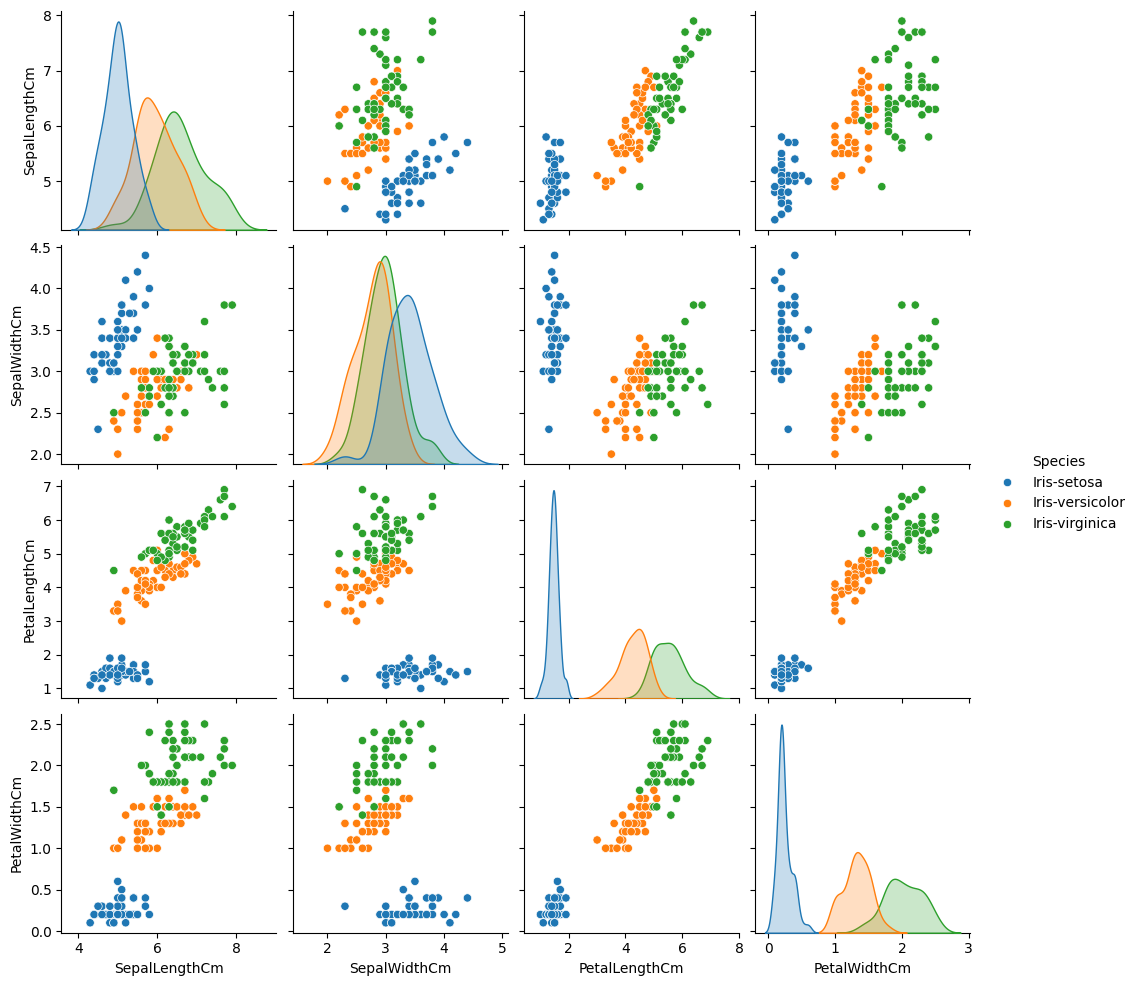

In [10]:
sns.pairplot(dataset,hue="Species",diag_kind="kde")

[4]   
В табличном варианте оценить степень сопряженности пар признак-признак на всем
датасете, используя коэффициенты корреляции Пирсона и Спирмана, с p-критериями для
коэффициентов. 
  
В табличном варианте также оценить степень сопряженности пар признак-
признак в каждом отдельном классе, используя коэффициенты корреляции Пирсона и
Спирмана, с p-критериями для коэффициентов.
   
Таблицы корреляций также отобразить как
тепловые карты.

Корреляция для всего датасета(Pearson):
               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000

Корреляция для всего датасета(Spearman):
               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.159457       0.881386      0.834421
SepalWidthCm       -0.159457      1.000000      -0.303421     -0.277511
PetalLengthCm       0.881386     -0.303421       1.000000      0.936003
PetalWidthCm        0.834421     -0.277511       0.936003      1.000000

Р-критерии для коэффицентов Пирсона на всём датасете:
               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm            NaN  1.827652e-01   1.038454e-47  2.314849e-37

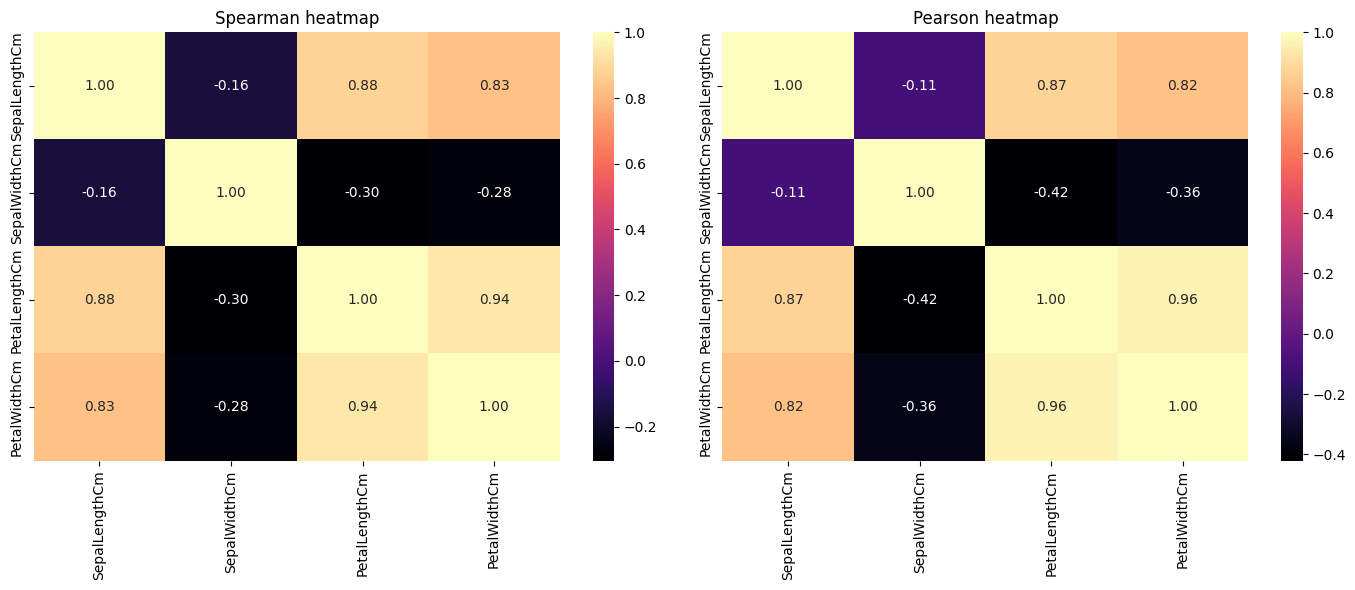

In [11]:
#На всем датасете
data_to_corr = dataset.drop(columns="Species")
data_corr_pearson = data_to_corr.corr(method="pearson")
data_corr_spearman = data_to_corr.corr(method="spearman")
print(f"Корреляция для всего датасета(Pearson):\n{data_corr_pearson}")
print()
print(f"Корреляция для всего датасета(Spearman):\n{data_corr_spearman}")
print()

features_pair = list(itertools.combinations(features,2))
spearman_p_value = pd.DataFrame(index=features,columns=features,dtype=float)
pearson_p_value = pd.DataFrame(index=features,columns=features,dtype=float)

def calc_p_values(method):
    for f1,f2 in features_pair:
        x = dataset[f1]
        y = dataset[f2]

        if method == 'pearson':
            r,p = pearsonr(x,y)
            pearson_p_value.loc[f1,f2] = p
            pearson_p_value.loc[f2,f1] = p
        else:
            r,p = spearmanr(x,y)
            spearman_p_value.loc[f1,f2] = p
            spearman_p_value.loc[f2,f1] = p
calc_p_values("pearson")
calc_p_values("spearman")
print(f"Р-критерии для коэффицентов Пирсона на всём датасете:\n{pearson_p_value}")
print()
print(f"Р-критерии для коэффицентов Спирмана на всём датасете:\n{spearman_p_value}")

fig, axes = plt.subplots(1,2,figsize = (14,6))

spearman_heatmap = sns.heatmap(data_corr_spearman,annot=True,fmt=".2f",cmap="magma",ax=axes[0])
axes[0].set_title('Spearman heatmap')

pearson_heatmap = sns.heatmap(data_corr_pearson,annot=True,fmt=".2f",cmap="magma",ax=axes[1])
axes[1].set_title('Pearson heatmap')

plt.tight_layout()
plt.show()

In [12]:
def class_corr(class_name):
    data = dataset[dataset["Species"] == f"{class_name}"]
    data_to_corr = data.drop(columns="Species")
    data_corr_pearson = data_to_corr.corr(method="pearson")
    data_corr_spearman = data_to_corr.corr(method="spearman")
    print(f"Корреляция для {class_name}(Pearson):\n{data_corr_pearson}")
    print()
    print(f"Корреляция для {class_name}(Spearman):\n{data_corr_spearman}")
    print()

    features_pair = list(itertools.combinations(features,2))
    spearman_p_value = pd.DataFrame(index=features,columns=features,dtype=float)
    pearson_p_value = pd.DataFrame(index=features,columns=features,dtype=float)

    def calc_p_values(method):
        for f1,f2 in features_pair:
            x = data[f1]
            y = data[f2]

            if method == 'pearson':
                r,p = pearsonr(x,y)
                pearson_p_value.loc[f1,f2] = p
                pearson_p_value.loc[f2,f1] = p
            else:
                r,p = spearmanr(x,y)
                spearman_p_value.loc[f1,f2] = p
                spearman_p_value.loc[f2,f1] = p
    calc_p_values("pearson")
    calc_p_values("spearman")
    print(f"Р-критерии для коэффицентов Пирсона на {class_name}:\n{pearson_p_value}")
    print()
    print(f"Р-критерии для коэффицентов Спирмана на {class_name}:\n{spearman_p_value}")

    fig, axes = plt.subplots(1,2,figsize = (14,6))

    spearman_heatmap = sns.heatmap(data_corr_spearman,annot=True,fmt=".2f",cmap="magma",ax=axes[0])
    axes[0].set_title('Spearman heatmap')

    pearson_heatmap = sns.heatmap(data_corr_pearson,annot=True,fmt=".2f",cmap="magma",ax=axes[1])
    axes[1].set_title('Pearson heatmap')

    plt.tight_layout()
    plt.show()

Корреляция для Iris-setosa(Pearson):
               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000      0.746780       0.263874      0.279092
SepalWidthCm        0.746780      1.000000       0.176695      0.279973
PetalLengthCm       0.263874      0.176695       1.000000      0.306308
PetalWidthCm        0.279092      0.279973       0.306308      1.000000

Корреляция для Iris-setosa(Spearman):
               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000      0.768609       0.268246      0.304453
SepalWidthCm        0.768609      1.000000       0.181160      0.366301
PetalLengthCm       0.268246      0.181160       1.000000      0.227275
PetalWidthCm        0.304453      0.366301       0.227275      1.000000

Р-критерии для коэффицентов Пирсона на Iris-setosa:
               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm            NaN  4.751987e-10       0.064077      0.049675
SepalWi

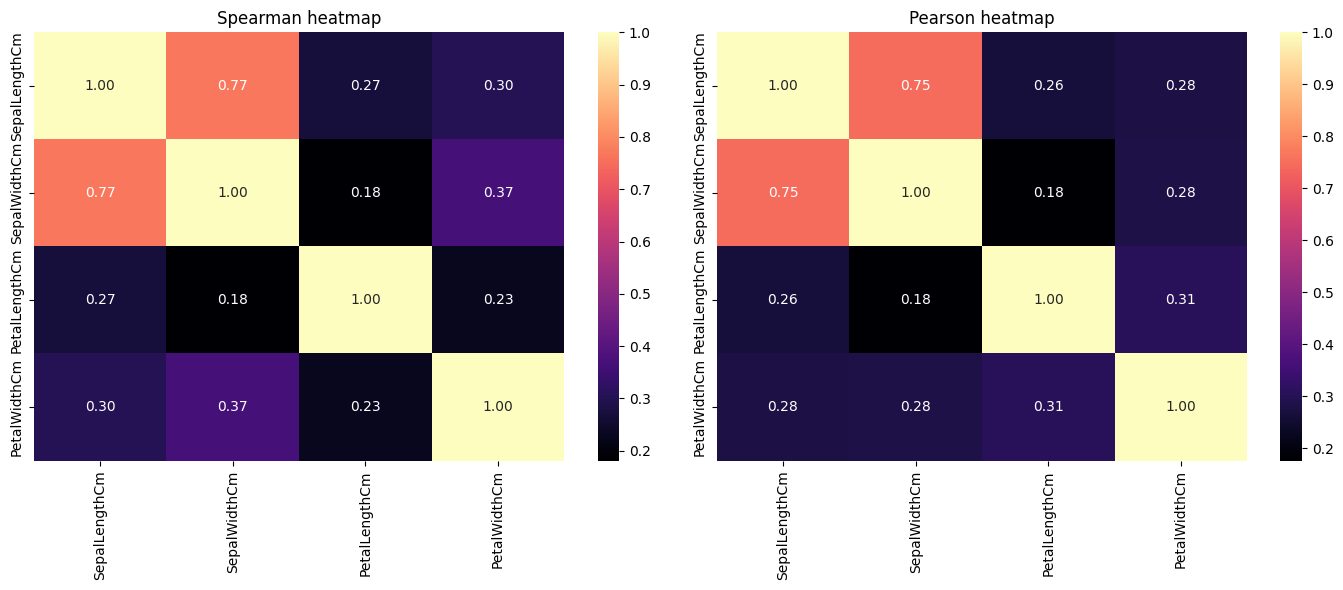

In [13]:
class_corr("Iris-setosa")

Корреляция для Iris-versicolor(Pearson):
               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000      0.525911       0.754049      0.546461
SepalWidthCm        0.525911      1.000000       0.560522      0.663999
PetalLengthCm       0.754049      0.560522       1.000000      0.786668
PetalWidthCm        0.546461      0.663999       0.786668      1.000000

Корреляция для Iris-versicolor(Spearman):
               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000      0.517606       0.736625      0.548679
SepalWidthCm        0.517606      1.000000       0.574727      0.659983
PetalLengthCm       0.736625      0.574727       1.000000      0.787010
PetalWidthCm        0.548679      0.659983       0.787010      1.000000

Р-критерии для коэффицентов Пирсона на Iris-versicolor:
               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm            NaN  8.771860e-05   2.586190e-10  4.035422

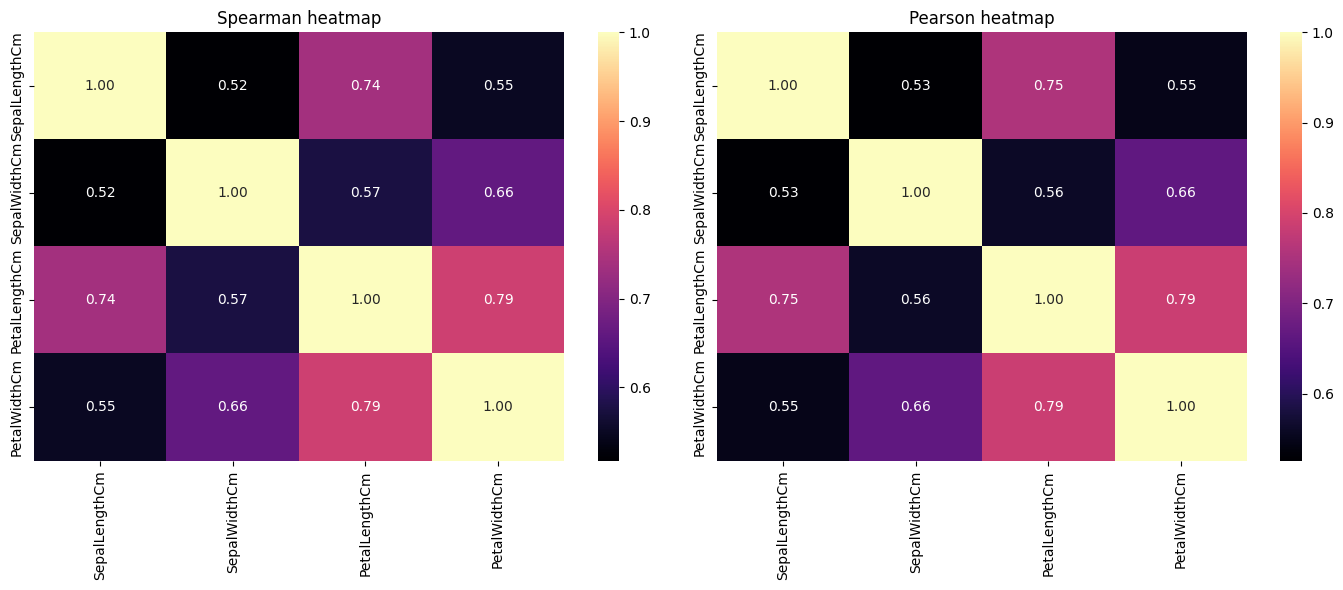

In [14]:
class_corr("Iris-versicolor")

Корреляция для Iris-virginica(Pearson):
               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000      0.457228       0.864225      0.281108
SepalWidthCm        0.457228      1.000000       0.401045      0.537728
PetalLengthCm       0.864225      0.401045       1.000000      0.322108
PetalWidthCm        0.281108      0.537728       0.322108      1.000000

Корреляция для Iris-virginica(Spearman):
               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000      0.426517       0.824323      0.315772
SepalWidthCm        0.426517      1.000000       0.387359      0.544310
PetalLengthCm       0.824323      0.387359       1.000000      0.362913
PetalWidthCm        0.315772      0.544310       0.362913      1.000000

Р-критерии для коэффицентов Пирсона на Iris-virginica:
               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm            NaN      0.000843   6.297786e-16      0.04798

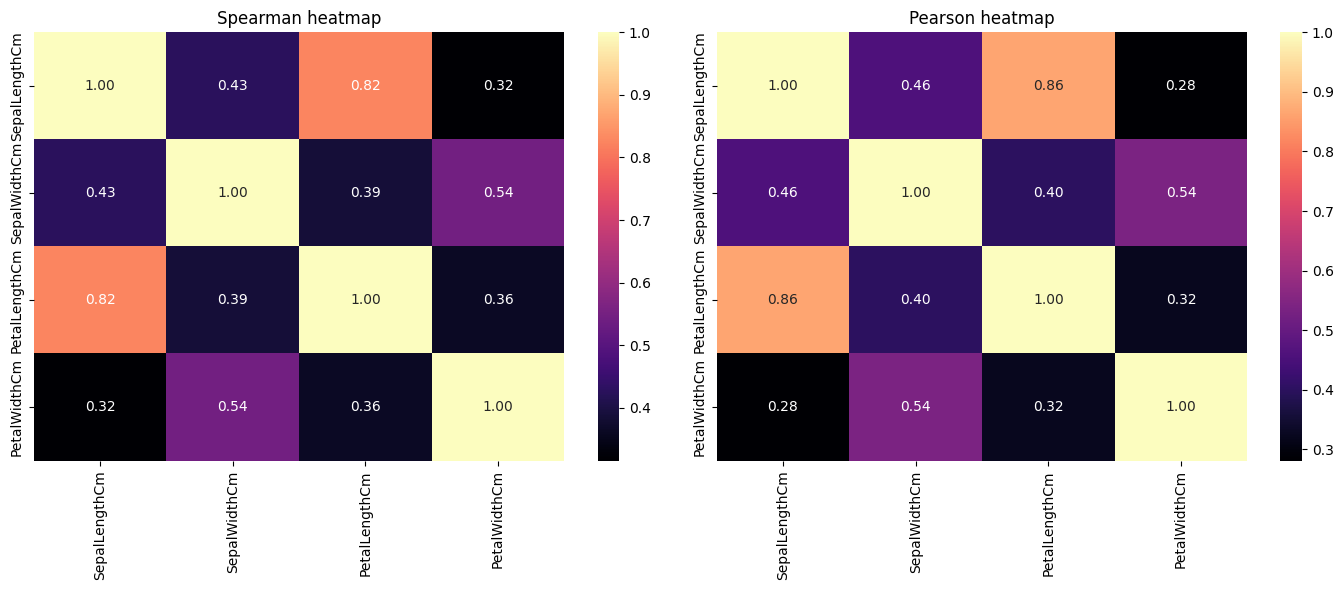

In [15]:
class_corr("Iris-virginica")

[5] Отдельно повторно выполнить пункт [3]; на каждом из графиков для каждого из классов
отобразить линию линейной регрессии с соответствующими прогнозными интервалами
регрессий (95% predictive bands).

[6] Повторить пункт [5], но с доверительными интервалами регрессий (95% confidence
bands).

[7] Вывести формулы каждой линейной регрессии вместе со значениями критерия R2,  
критерия Вальда (F-критерий, его степени свободы и соответствующий p-критерий),  
критерия LR (хи-квадрат-критерий, степени свободы и соответствующий p-критерий),  
критерия score (хи-квадрат-критерий, степени свободы и соответствующий p-критерий).

In [ ]:
def regression_plot(x, y, color='blue'):
        ax = plt.gca()
        x_vals, y_vals = np.array(x), np.array(y)
        n = len(x_vals)
        
        X = sm.add_constant(x_vals)
        model = sm.OLS(y_vals, X).fit()
            
        x_range = np.linspace(x_vals.min(), x_vals.max(), 100)
        X_pred = sm.add_constant(x_range)
        pred_mean = model.predict(X_pred)
        
        predictions = model.get_prediction(X_pred)
        ci = predictions.conf_int(alpha=0.05)
        pi = predictions.conf_int(alpha=0.05, obs=True)
        pi_lower, pi_upper = pi[:, 0], pi[:, 1]
        
        b0, b1 = model.params
        r2 = model.rsquared

        #wald    
        wald_stat = n * r2 / (1 - r2)
        wald_p = chi2.sf(wald_stat, 1)
        wald_f = ((n - 2) * wald_stat) / n  

        #lr 
        lr_stat = -n * np.log(1 - r2)
        lr_p = chi2.sf(lr_stat, 1) 

        #score
        score_stat = n * r2
        score_p = chi2.sf(score_stat, 1)  

        formula = f"y={b0:.2f}+{b1:.2f}x"
        main_stats = (
            f"{formula}\n"
            f"R² = {r2:.3f}\n"
            f"Wald = {wald_stat:.3f}, df = 1\n"
            f"Wald_p = {wald_p:.3f}\n"
            f"Wald_f = {wald_f:.3f}, df = 1/48\n"
            f"LR = {lr_stat:.3f}, df = 1\n"
            f"LR_p = {lr_p:.3f}\n"
            f"Score = {score_stat:.3f}, df = 1\n"
            f"Score_p = {score_p:.3f}\n"
        )

        ax.scatter(x_vals, y_vals, alpha=0.7, color=color, s=15)
        ax.plot(x_range, pred_mean, color=color, linewidth=1.5)
        
        ax.fill_between(x_range, ci[:, 0], ci[:, 1], alpha=0.2, color='green')
        ax.fill_between(x_range, pi_lower, pi_upper, alpha=0.15, color='lightcoral')
        
        ax.text(0.98, 0.7, main_stats, transform=ax.transAxes,
                fontsize=6, verticalalignment='top', 
                bbox=dict(boxstyle='round,pad=0.3', facecolor='lightyellow', 
                        alpha=0.9, edgecolor='orange', linewidth=0.8)) 
    

def class_plot(class_name):  
    g = sns.PairGrid(dataset[dataset['Species']==class_name], height=2.8, diag_sharey=False)
    g.map_lower(regression_plot)
    g.map_upper(regression_plot)
    g.map_diag(sns.kdeplot, fill=True, color='purple', alpha=0.6)

    g.fig.suptitle(f'{class_name}',fontsize=16, y=0.98, fontweight='bold')
    g.fig.set_size_inches(14, 14)

    plt.tight_layout()
    plt.subplots_adjust(top=0.93)
    plt.show()

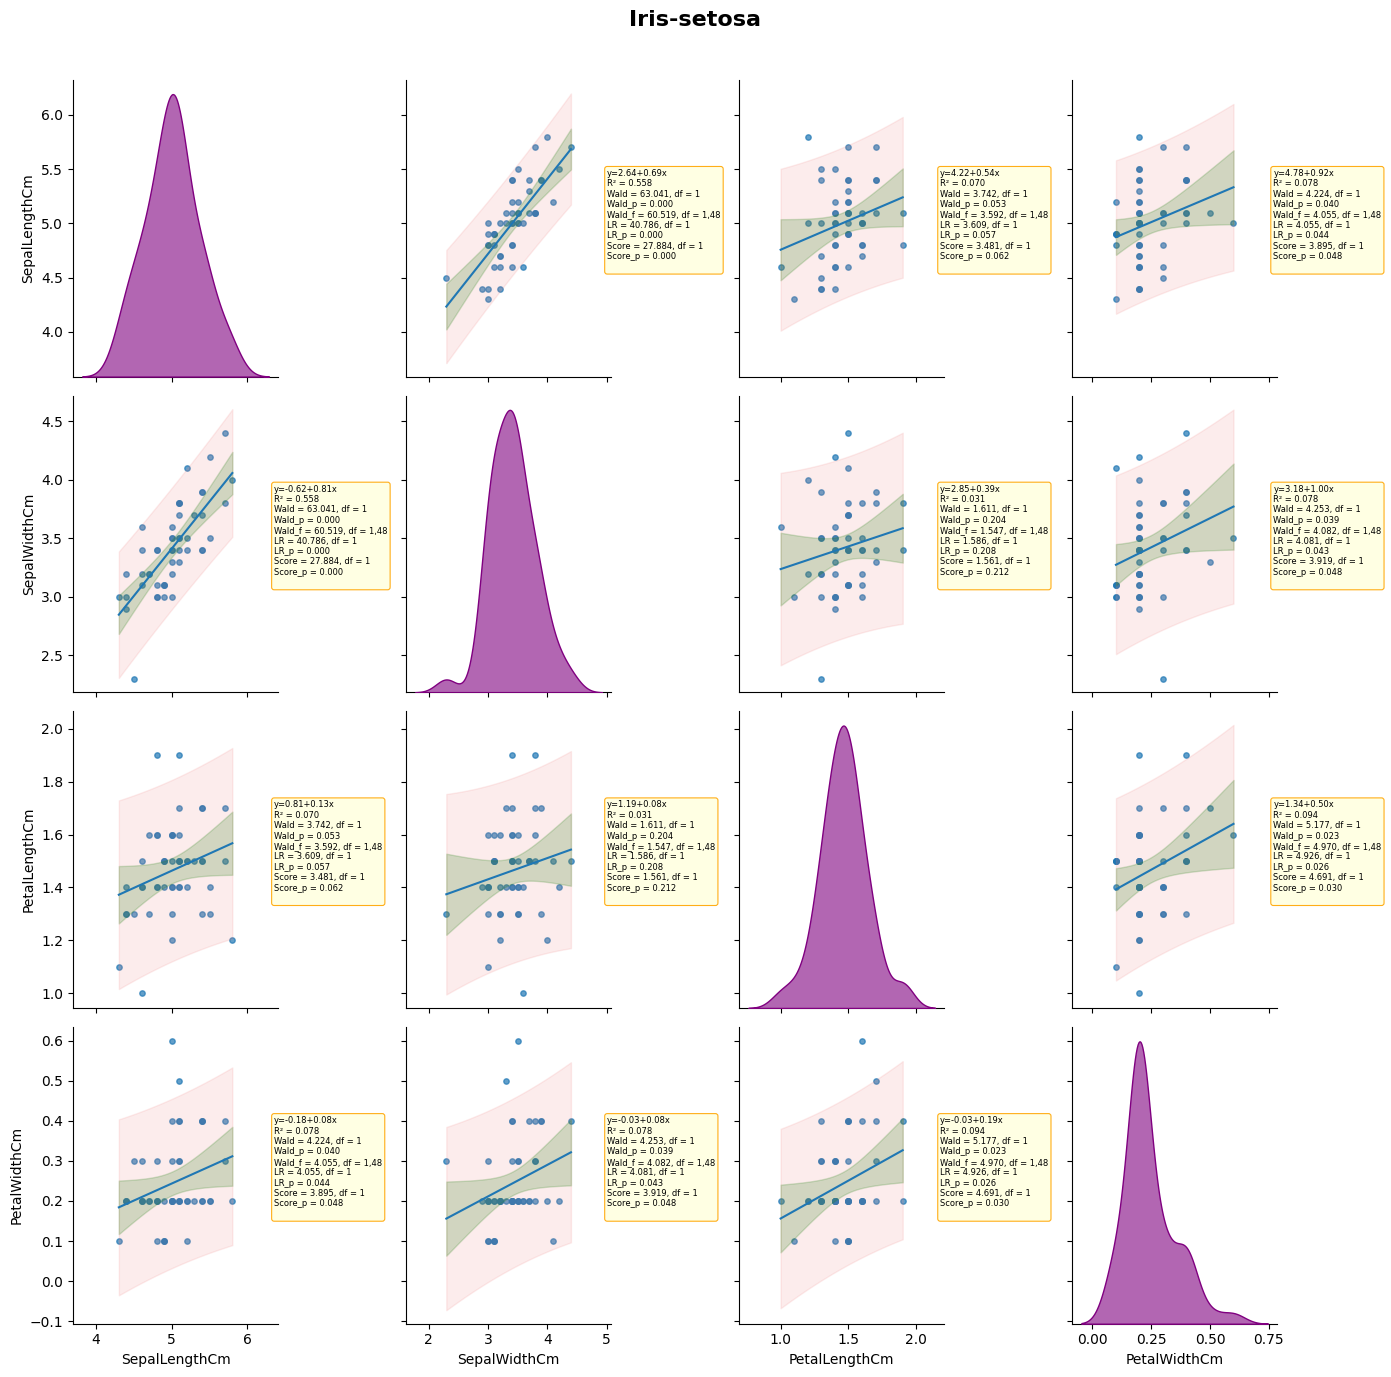

In [37]:
class_plot("Iris-setosa")

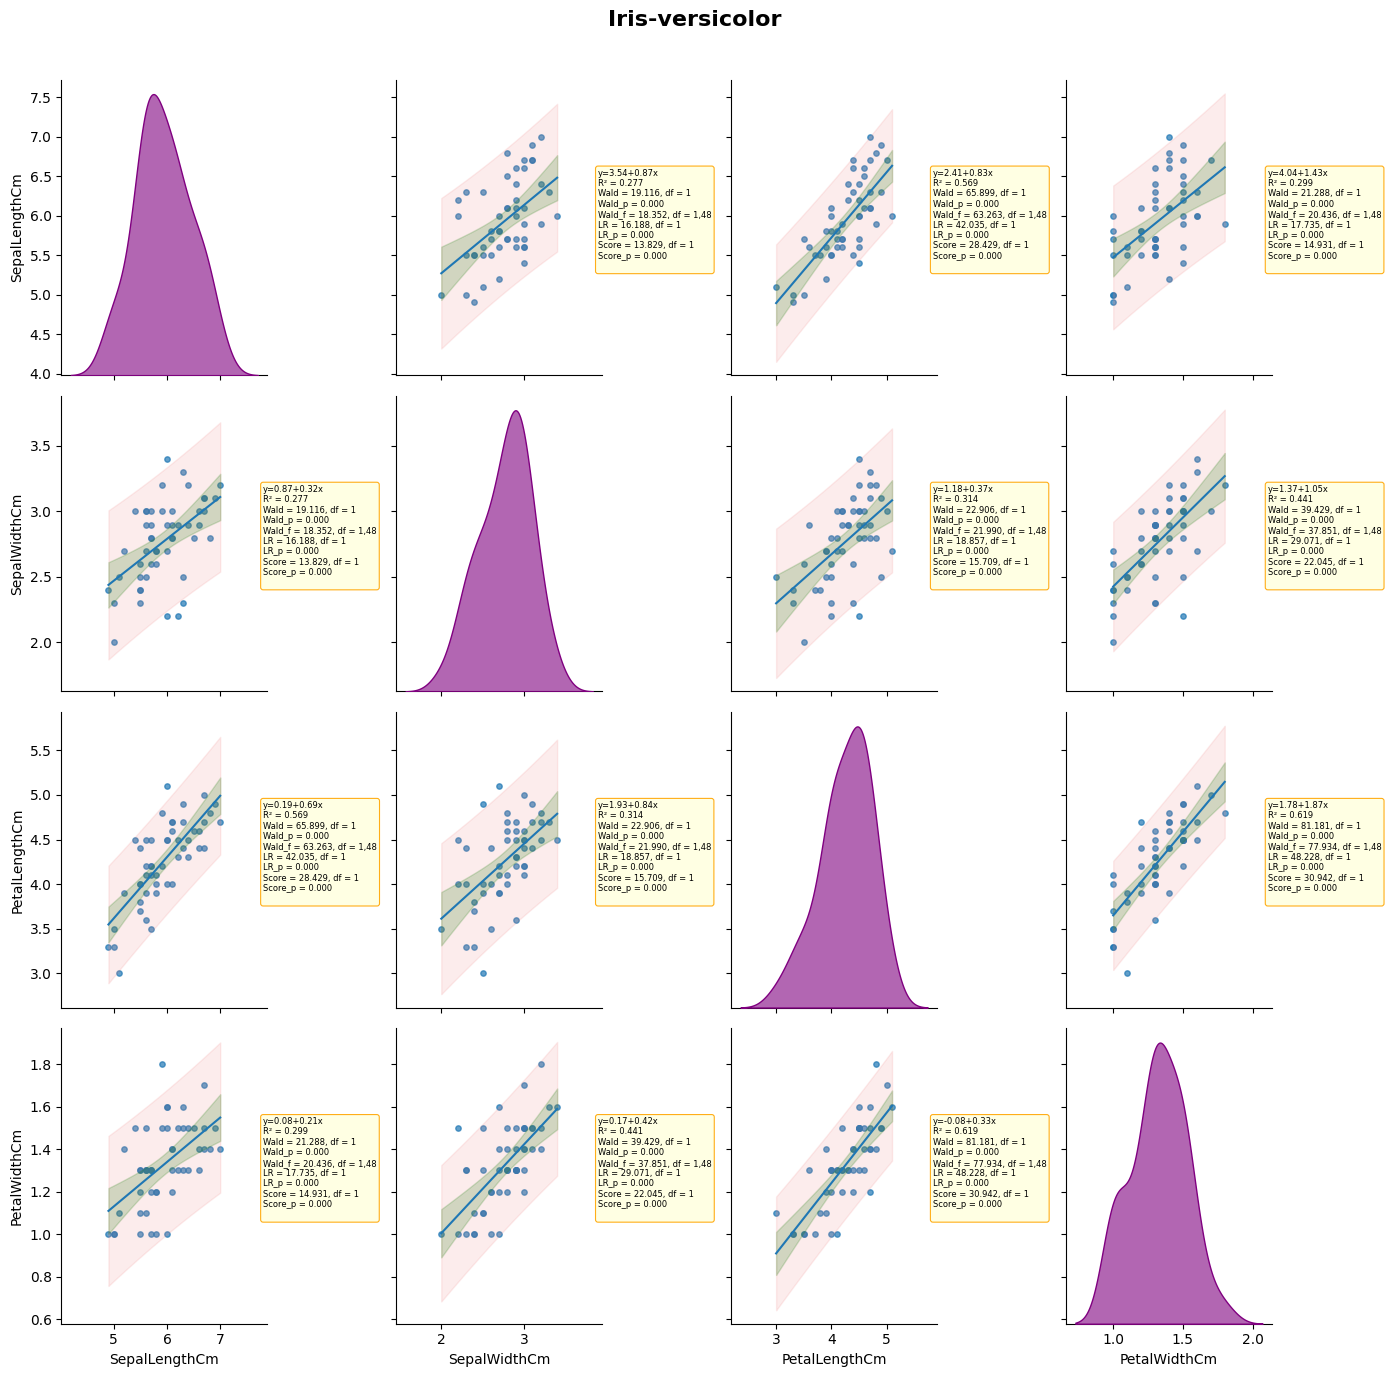

In [38]:
class_plot("Iris-versicolor")

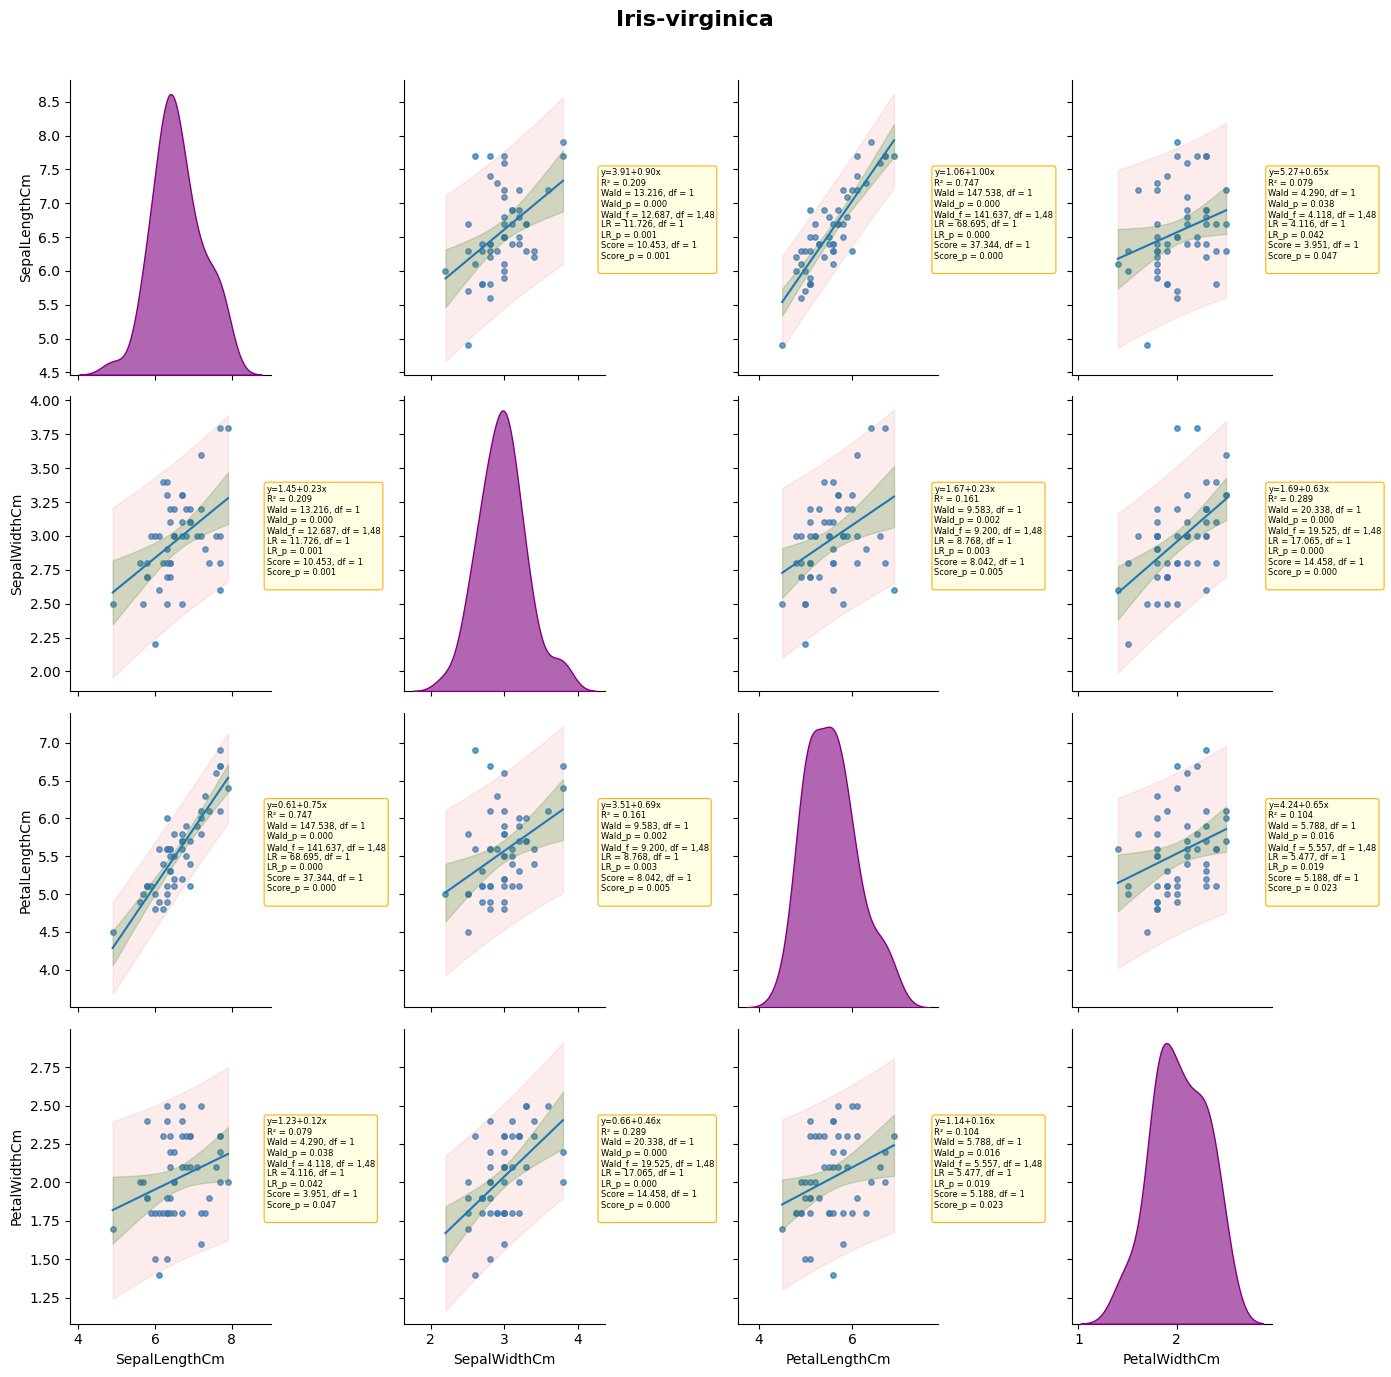

In [39]:
class_plot("Iris-virginica")

[8] Выбрать любой количественный признак и выполнить дисперсионный анализ (ANOVA):  
- Рассчитать F-критерий, его степени свободы и соответствующий ему p-критерий для
всех классов одновременно;  
- Рассчитать F-критерий, степени свободы и соответствующий ему p-критерий для каждой
пары сравниваемых классов;  
- Визуализировать выбранный количественный признак для каждого из классов в виде
raincloud plot with jittering, рядом с каждым классом в виде boxplot отобразить медианы,
межквартильные размахи (IQR) и 95% доверительные интервалы.

[9] Повторить пункт [8] для каждого отдельного из остальных трех признаков.

In [40]:
def print_anova_results(F, p, df_between, df_within, title):
    print(f"\n{title}:")
    print(f"F-критерий: {F:.4f}, p-значение: {p:.4e}")
    print(f"Степени свободы: между группами = {df_between}, внутри групп = {df_within}")


def feature_anova(feature_name):
    print(f"{feature_name}")

    data_by_class = {cls: dataset[dataset['Species'] == cls][feature_name] for cls in classes}

    groups = [data_by_class[cls] for cls in classes]
    F_all, p_all = f_oneway(*groups)
    k, N = len(classes), sum(len(group) for group in groups)
    print_anova_results(F_all, p_all, k - 1, N - k, "ANOVA для всех классов")

    print("\nANOVA для пар классов:")
    for cls1, cls2 in itertools.combinations(classes, 2):
        group1, group2 = data_by_class[cls1], data_by_class[cls2]
        F_pair, p_pair = f_oneway(group1, group2)
        print_anova_results(F_pair, p_pair, 1, len(group1) + len(group2) - 2, f"Пара: {cls1} vs {cls2}")


def confidence_interval(data, confidence=0.95):
    mean, sem = np.mean(data), np.std(data) / np.sqrt(len(data))
    t_value = t.ppf((1 + confidence) / 2, len(data) - 1)
    ci = t_value * sem
    return mean - ci, mean + ci


def half_violinplot_left(ax, data, pos, color):
    parts = ax.violinplot(data, positions=[pos], widths=0.8, showmeans=False, showextrema=False, showmedians=False)
    for pc in parts['bodies']:
        verts = pc.get_paths()[0].vertices
        mean_x = np.mean(verts[:, 0])
        verts[:, 0] = np.clip(verts[:, 0], -np.inf, mean_x)
        pc.set_facecolor(color)
        pc.set_edgecolor('black')
        pc.set_alpha(0.7)
        ax.add_collection(pc)
    return parts


def raincloud_plot(feature_name):
    plt.figure(figsize=(10, 6))
    ax = plt.gca()
    colors = sns.color_palette('Set2', len(classes))

    for i, cls in enumerate(classes):
        class_data = dataset[dataset['Species'] == cls][feature_name].dropna()
        if len(class_data) == 0:
            continue
    
        half_violinplot_left(ax, class_data.values, pos=i - 0.15, color=colors[i])

        pos_box = i + 0.05
        bp = ax.boxplot([class_data.values], positions=[pos_box], widths=0.15, patch_artist=True,
                        showmeans=False, showfliers=True)
        bp['boxes'][0].set_facecolor(colors[i])
        bp['boxes'][0].set_alpha(0.8)

        jitter = np.random.normal(0, 0.05, len(class_data))
        x_jittered = pos_box + jitter
        ax.scatter(x_jittered, class_data.values, alpha=0.6, s=20, color=colors[i])

        ci_lower, ci_upper = confidence_interval(class_data.values)
        mean_val = np.mean(class_data.values)
        ax.errorbar(pos_box, mean_val, yerr=[[mean_val - ci_lower], [ci_upper - mean_val]],
                    fmt='none', c='black', capsize=5, linewidth=1, elinewidth=1, capthick=1)

    ax.set_title(f'{feature_name}')
    ax.set_xlabel('Species')
    ax.set_ylabel(feature_name)
    ax.set_xticks(range(len(classes)))
    ax.set_xticklabels(classes)
    plt.tight_layout()
    plt.show()

SepalLengthCm

ANOVA для всех классов:
F-критерий: 119.2645, p-значение: 1.6697e-31
Степени свободы: между группами = 2, внутри групп = 147

ANOVA для пар классов:

Пара: Iris-setosa vs Iris-versicolor:
F-критерий: 110.6912, p-значение: 8.9852e-18
Степени свободы: между группами = 1, внутри групп = 98

Пара: Iris-setosa vs Iris-virginica:
F-критерий: 236.7350, p-значение: 6.8925e-28
Степени свободы: между группами = 1, внутри групп = 98

Пара: Iris-versicolor vs Iris-virginica:
F-критерий: 31.6875, p-значение: 1.7249e-07
Степени свободы: между группами = 1, внутри групп = 98


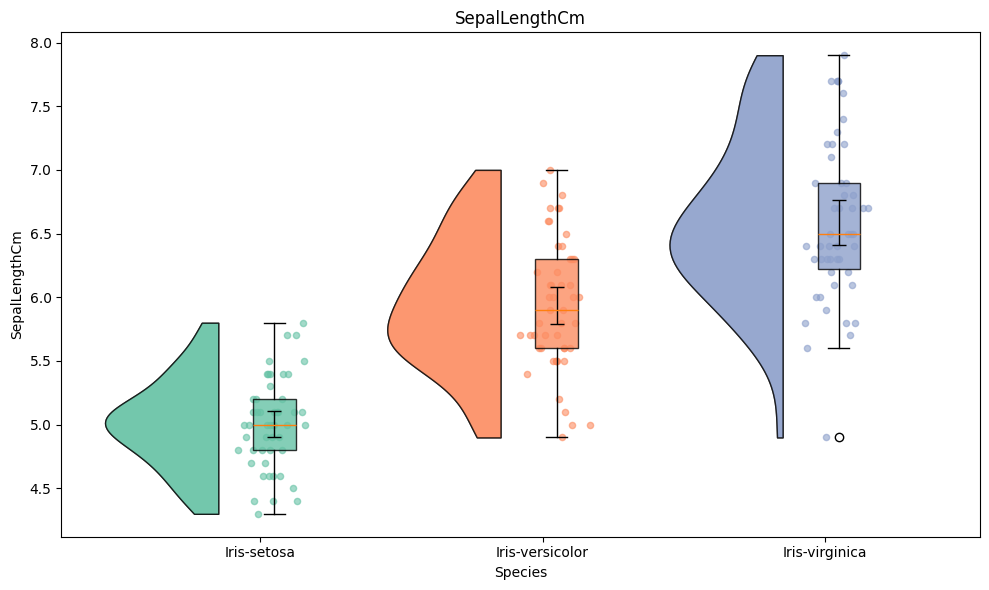

In [41]:
feature_anova("SepalLengthCm")
raincloud_plot("SepalLengthCm")

SepalWidthCm

ANOVA для всех классов:
F-критерий: 47.3645, p-значение: 1.3279e-16
Степени свободы: между группами = 2, внутри групп = 147

ANOVA для пар классов:

Пара: Iris-setosa vs Iris-versicolor:
F-критерий: 86.1699, p-значение: 4.3622e-15
Степени свободы: между группами = 1, внутри групп = 98

Пара: Iris-setosa vs Iris-virginica:
F-критерий: 39.5564, p-значение: 8.9166e-09
Степени свободы: между группами = 1, внутри групп = 98

Пара: Iris-versicolor vs Iris-virginica:
F-критерий: 10.2769, p-значение: 1.8191e-03
Степени свободы: между группами = 1, внутри групп = 98


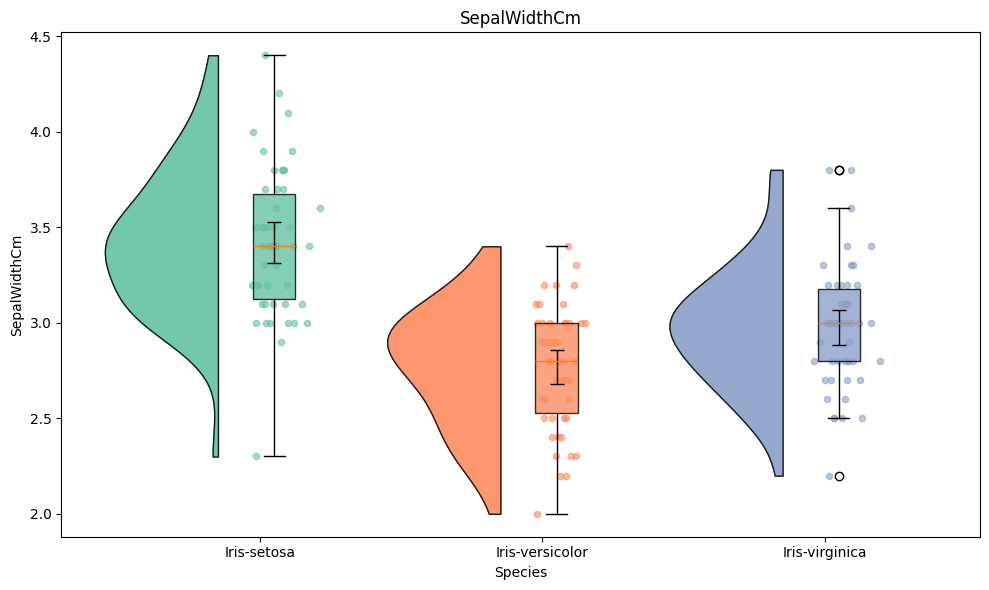

In [42]:
feature_anova("SepalWidthCm")
raincloud_plot("SepalWidthCm")

PetalLengthCm

ANOVA для всех классов:
F-критерий: 1179.0343, p-значение: 3.0520e-91
Степени свободы: между группами = 2, внутри групп = 147

ANOVA для пар классов:

Пара: Iris-setosa vs Iris-versicolor:
F-критерий: 1557.7753, p-значение: 5.7175e-62
Степени свободы: между группами = 1, внутри групп = 98

Пара: Iris-setosa vs Iris-virginica:
F-критерий: 2496.5715, p-значение: 1.5641e-71
Степени свободы: между группами = 1, внутри групп = 98

Пара: Iris-versicolor vs Iris-virginica:
F-критерий: 158.8553, p-значение: 3.1788e-22
Степени свободы: между группами = 1, внутри групп = 98


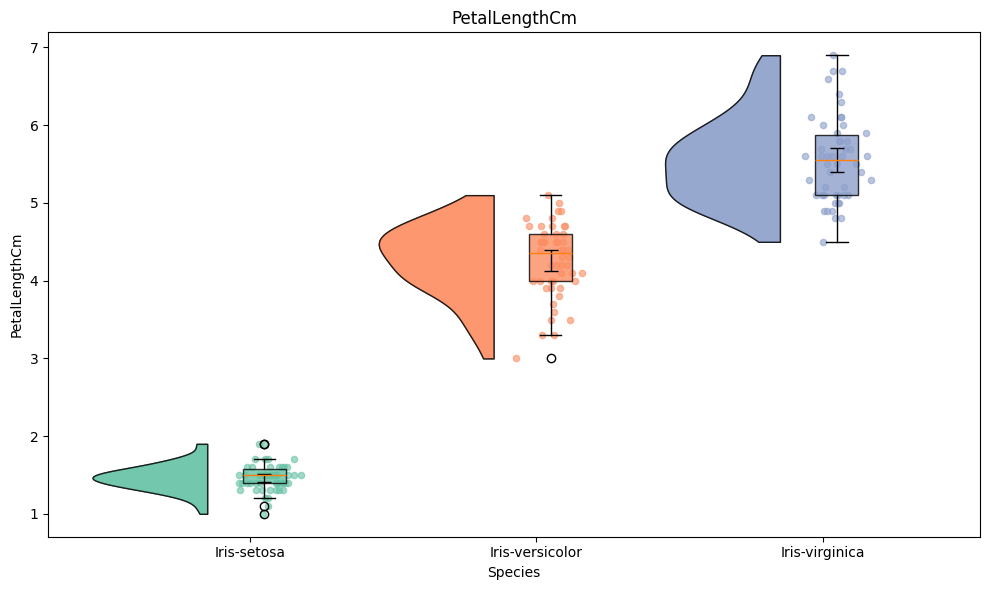

In [43]:
feature_anova("PetalLengthCm")
raincloud_plot("PetalLengthCm")

PetalWidthCm

ANOVA для всех классов:
F-критерий: 959.3244, p-значение: 4.3770e-85
Степени свободы: между группами = 2, внутри групп = 147

ANOVA для пар классов:

Пара: Iris-setosa vs Iris-versicolor:
F-критерий: 1156.8419, p-значение: 4.5891e-56
Степени свободы: между группами = 1, внутри групп = 98

Пара: Iris-setosa vs Iris-virginica:
F-критерий: 1826.5563, p-значение: 3.5827e-65
Степени свободы: между группами = 1, внутри групп = 98

Пара: Iris-versicolor vs Iris-virginica:
F-критерий: 213.9014, p-значение: 2.2304e-26
Степени свободы: между группами = 1, внутри групп = 98


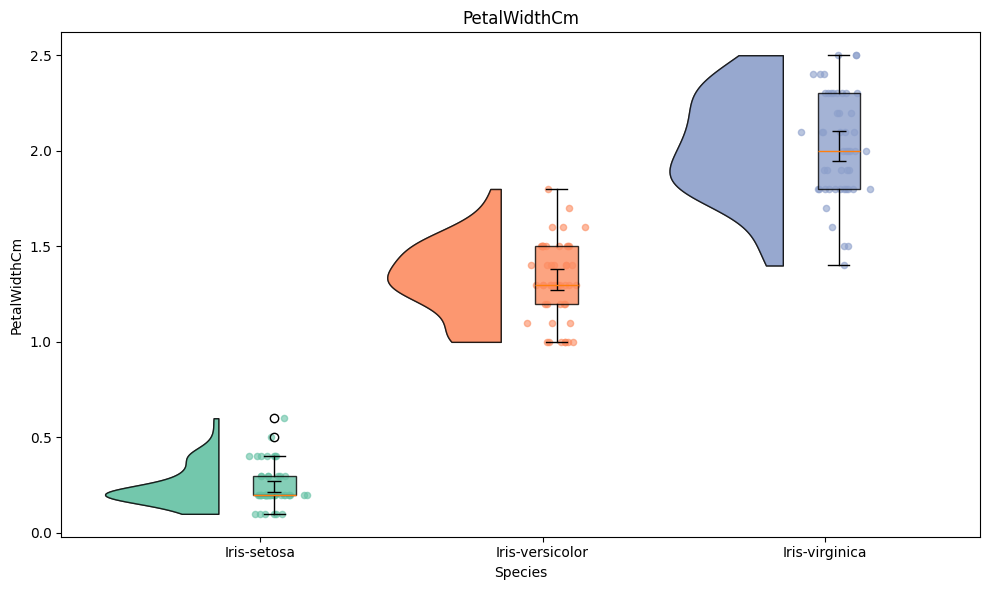

In [44]:
feature_anova("PetalWidthCm")
raincloud_plot("PetalWidthCm")